In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline
import scipy.stats as st

In [263]:
import statsmodels.stats.multicomp as mc

In [207]:
df_fifa_stats = pd.read_csv('C:/Users/hareeshkumar.s/Downloads/Stats_mini_question/fifa_stats.csv')

df_fifa_stats.head(5)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [208]:
df_fifa_stats.shape

(2000, 15)

In [209]:
df_fifa_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

# ##                                     Exploratory Data Analysis 

## 1 . Handling Null values

In [210]:
df_fifa_stats.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [211]:
# There are 19 Nan values in Club feature

In [212]:
(df_fifa_stats.Club.isnull().sum() / df_fifa_stats.shape[0])  * 100 

0.95

In [213]:
# Percentage of Null values in CLub is 0.95 , Hence as per the Procedure , the rows will be dropped

In [214]:
df_fifa_stats.dropna(subset =['Club'],axis=0,inplace=True)

In [215]:
df_fifa_stats.shape # Checking the Shape after dropping the rows

(1981, 15)

In [216]:
df_fifa_stats.isnull().sum() # Checking the Nan again after Handling Empty Values

Name                        0
Age                         0
Nationality                 0
Overall_rating              0
Potential                   0
Club                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Jersey Number               0
Height                      0
Weight                      0
dtype: int64

## 2. Handling Categorical Features

In [217]:
df_fifa_stats.head(2)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183


In [218]:
df_fifa_stats['Preferred Foot'].value_counts()

Right    1519
Left      462
Name: Preferred Foot, dtype: int64

In [219]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df_fifa_stats['Label_Preferred_Foot'] = LE.fit_transform(df_fifa_stats['Preferred Foot'])

df_fifa_stats.head(2)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight,Label_Preferred_Foot
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159,0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183,1


In [220]:
# Using Label Encoder , converted Left - 0 and Right - 1 for Preferred Foot

In [221]:
df_fifa_stats['Label_Preferred_Foot'].value_counts()

1    1519
0     462
Name: Label_Preferred_Foot, dtype: int64

In [222]:
df_fifa_stats.drop(['Preferred Foot'],axis=1,inplace = True)

In [223]:
df_fifa_stats.rename(columns = {'Label_Preferred_Foot' : 'Preferred Foot'},inplace=True)

In [224]:
df_fifa_stats.head(2)

,Name,Age,Nationality,Overall_rating,Potential,Club,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight,Preferred Foot
0,L. Messi,31,Argentina,94,94,FC Barcelona,5,4,4,Medium/ Medium,RF,10,5.583333,159,0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,5,4,5,High/ Low,ST,7,6.166667,183,1


In [225]:
df_fifa_stats.shape

(1981, 15)

### Dropping Duplicate Rows

In [226]:
df_fifa_stats.drop_duplicates(inplace = True)

In [227]:
df_fifa_stats.shape # There are no duplicate rows

(1981, 15)

## Handling Outliers

In [74]:
df_fifa_stats.head(2)

,Name,Age,Nationality,Overall_rating,Potential,Club,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight,Preferred Foot
0,L. Messi,31,Argentina,94,94,FC Barcelona,5,4,4,Medium/ Medium,RF,10,5.583333,159,0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,5,4,5,High/ Low,ST,7,6.166667,183,1


In [233]:
# Separating Numerical and Categorical values for Outlisting Outliers
num = df_fifa_stats.select_dtypes(include=np.number) 
cat = df_fifa_stats.select_dtypes(exclude = np.number)

In [234]:
num.head(2)

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,Preferred Foot
0,31,94,94,5,4,4,10,5.583333,159,0
1,33,94,94,5,4,5,7,6.166667,183,1


In [235]:
cat.head(2)

,Name,Nationality,Club,Work Rate,Position
0,L. Messi,Argentina,FC Barcelona,Medium/ Medium,RF
1,Cristiano Ronaldo,Portugal,Juventus,High/ Low,ST


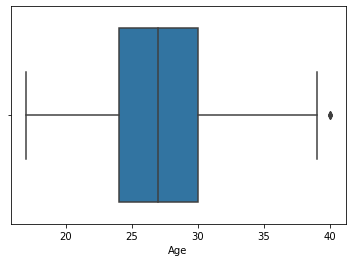

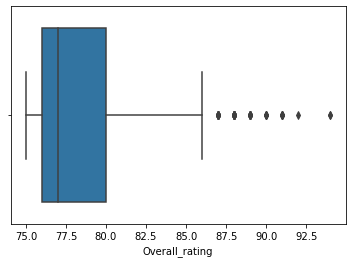

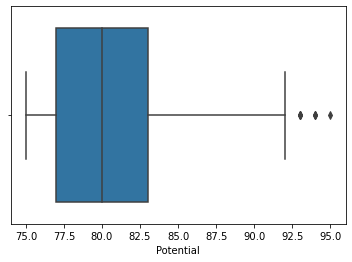

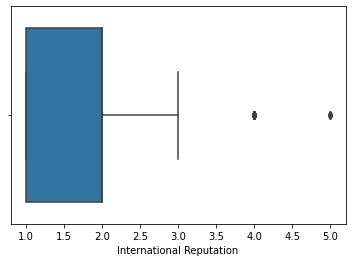

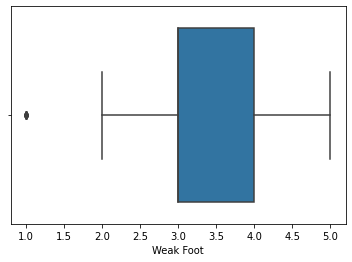

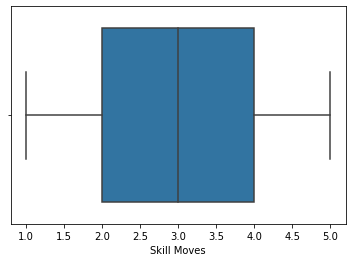

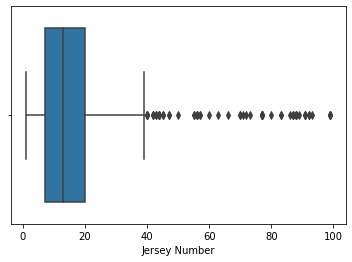

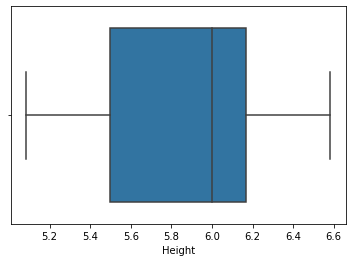

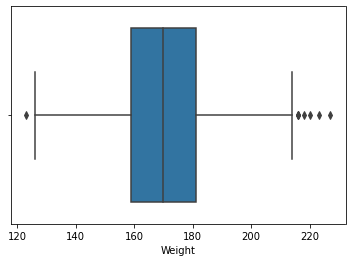

In [237]:
for i in num.columns:
    if i == 'Preferred Foot':  # Skipping Preferred Foot as it is Label Encoded
        continue
    sns.boxplot(df_fifa_stats[i])
    plt.show()

In [238]:
# Age Feature does not have outliers
# There are few outliers in Overall_rating fetaures but as per domain expertise, we can keep these outliers
# There are few outliers in potential fetaures but as per domain expertise, we can keep these outliers
# No Outliers in International Reputition
#No outliers in Weak Foot
#No Outliers in Skill Moves
#There are some outliers in Jersey Key But may not affect anything , we can keep this outliers
# Weight - No Outliers
# Height Feature does not have Outliers 

# Statistical Analysis - Inferential Stats

In [109]:
# Taking the sample size of 200

In [239]:
import random

age = list(df_fifa_stats['Age'])

sample_age = random.sample(age,200) # Taking 200 sample ages

In [240]:
len(sample_age)

200

In [241]:
n = len(sample_age)
sample_std= np.std(sample_age,ddof=1)
sample_mean = np.mean(sample_age) # xbar
sample_SE = sample_std/np.sqrt(n) # s

print('Sample_Mean : ',sample_mean)
print('Sample Standard Deviation : ',sample_std)
print('Sample Standard Error :',sample_SE)

Sample_Mean :  27.26
Sample Standard Deviation :  3.8111710963466514
Sample Standard Error : 0.2694904926488886


In [242]:
pop_std= df_fifa_stats['Age'].std() # sigma
pop_mean = df_fifa_stats['Age'].mean() # mu

pop_se = pop_std/np.sqrt(len(df_fifa_stats)) # se

print('Population Mean : ',pop_mean)
print('Population Standard Deviation : ',pop_std)
print('Population Standard Error :',pop_se)

Population Mean :  27.215547703180214
Population Standard Deviation :  3.8525185996930396
Population Standard Error : 0.08655706191688464


In [243]:
# the estimated standard error of a sample mean tends to decrease with an increase in sample size because
# The larger the sample size , the smaller the Stanadard Error
# SE is inversely proportional to the size of the sample

In [244]:
# As per Central Limit Theorem, Mean of Population = Mean of Sampling Distribution and It follows Bell Curve

# b)	Is there any evidence that the players overall rating is greater than 80?

In [245]:
df_fifa_stats.head(2)

,Name,Age,Nationality,Overall_rating,Potential,Club,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight,Preferred Foot
0,L. Messi,31,Argentina,94,94,FC Barcelona,5,4,4,Medium/ Medium,RF,10,5.583333,159,0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,5,4,5,High/ Low,ST,7,6.166667,183,1


In [246]:
# H0 - mu <=80
# H1 - mu > 80

# It is advised to use One sample T test since Pop std is not unknown
alpha = 0.05
xbar =np.mean(df_fifa_stats['Overall_rating'])
s = np.std(df_fifa_stats['Overall_rating'],ddof=1)
n = len(df_fifa_stats)
mu =  80

t_crit = st.t.isf(alpha,n-1)
se = s/np.sqrt(n)

t_stats = (xbar - mu) / se

p_value = st.t.sf(abs(t_stats),n-1)

print('T critical value :',t_crit)
print('T stats :',abs(t_stats))
print('P_value :',p_value)

if p_value > alpha:
    print('Fail to Reject Null Hypothesis')
else:
    print('Reject Null Hypothesis and Accept Alternate')

T critical value : 1.645623569715414
T stats : 24.161970492711102
P_value : 1.5003473423359258e-113
Reject Null Hypothesis and Accept Alternate


In [247]:
# Using Built in Function

t_stats , p_value = st.ttest_1samp(df_fifa_stats['Overall_rating'],popmean=80)

t_stats , p_value/2

(-24.161970492711205, 1.5003473423331057e-113)

In [248]:
# Since p_value < alpha , we can confrm that There are evidences for the Players Overall Rating > 80.

### c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [143]:
df_fifa_stats.head(2)

,Name,Age,Nationality,Overall_rating,Potential,Club,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight,Preferred Foot,Overall_rating_SQRT,Overall_rating_log,Weight_SQRT,Weight_log
0,L. Messi,31,Argentina,94,94,FC Barcelona,5,4,4,Medium/ Medium,RF,10,5.583333,159,0,9.69536,4.543295,12.609520,5.068904
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,5,4,5,High/ Low,ST,7,6.166667,183,1,9.69536,4.543295,13.527749,5.209486


In [251]:
# H0 - Average Potential of Left Footed Player = Average Potential of Right Footed Player
# H1 - Average Potential of Left Footed Player != Average Potential of Right Footed Player
alpha = 0.05
z1 = df_fifa_stats[df_fifa_stats['Preferred Foot']==0]['Potential']
z2 = df_fifa_stats[df_fifa_stats['Preferred Foot']==1]['Potential']

st.ttest_ind(z1,z2)

# Since p_value is greater than alpha , we fail to reject Null Hypothesis
# Hence we can conclude that Foot has impact on Potential

Ttest_indResult(statistic=1.6316202307100005, pvalue=0.1029186188520214)

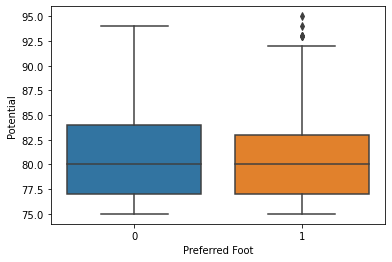

In [252]:
sns.boxplot(x=df_fifa_stats['Preferred Foot'],y=df_fifa_stats['Potential'])
plt.show()

In [253]:
# By the Above graph , we can draw an insight that Potential of Left Footer is equal to Potential of Right Footer

### d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [256]:
df_fifa_stats['Potential'].corr(df_fifa_stats['Overall_rating'])

0.7320858358909953

In [264]:
# H0 - No Relation between Overall Rating and Potential
# H1 - Some Relation between Overall Rating and Potential
alpha = 0.05

st.ttest_ind(df_fifa_stats['Potential'],df_fifa_stats['Overall_rating'])

# Since p_value < alpha , we reject Null Hypothesis and Accept Alternate
# There is some Relation Between Overall Rating and Potential

Ttest_indResult(statistic=17.86119755089141, pvalue=1.0957726628240538e-68)

In [260]:
# Since This feature failed in Shapiro and Levene Test , we can test this using One way Anova
st.f_oneway(df_fifa_stats['Potential'],df_fifa_stats['Overall_rating'])


F_onewayResult(statistic=319.0223779519678, pvalue=1.0957726628222977e-68)

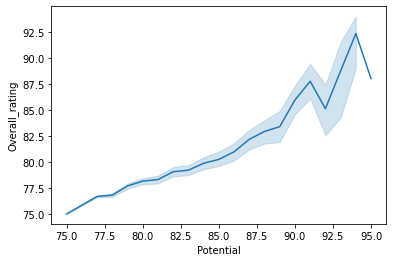

In [259]:
sns.lineplot(y=df_fifa_stats['Overall_rating'],x=df_fifa_stats['Potential'])
plt.show()

In [265]:
# Increase in Potential increases Overall_Rating

### e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

In [266]:
df_fifa_stats.head(2)

,Name,Age,Nationality,Overall_rating,Potential,Club,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight,Preferred Foot
0,L. Messi,31,Argentina,94,94,FC Barcelona,5,4,4,Medium/ Medium,RF,10,5.583333,159,0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,5,4,5,High/ Low,ST,7,6.166667,183,1


In [267]:
df_fifa_stats['Skill Moves'].unique()

array([4, 5, 1, 3, 2], dtype=int64)

In [270]:
# Ho - There is No difference in Overall Rating with Respect to Skill Moves(1,2,3,4,5)
# H1 - There is differnce in Skill Moves with Respect to atlease one Skill Moves

alpha = 0.05

f1= df_fifa_stats[df_fifa_stats['Skill Moves']==1]['Overall_rating']
f2= df_fifa_stats[df_fifa_stats['Skill Moves']==2]['Overall_rating']
f3= df_fifa_stats[df_fifa_stats['Skill Moves']==3]['Overall_rating']
f4= df_fifa_stats[df_fifa_stats['Skill Moves']==4]['Overall_rating']
f5= df_fifa_stats[df_fifa_stats['Skill Moves']==5]['Overall_rating']

st.f_oneway(f1,f2,f3,f4,f5)

# Since P_value < alpha , We Reject Null and Accept Alternate Hypothesis
# We can conclude that There is differnce in Skill Moves with Respect to atlease one Skill Move

F_onewayResult(statistic=30.65461769112108, pvalue=8.630701393554627e-25)

In [272]:
comp = mc.MultiComparison(df_fifa_stats['Overall_rating'],groups = df_fifa_stats['Skill Moves'])
post_hoc = comp.tukeyhsd(alpha = 0.05)
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.7167,0.0819,-1.4861,0.0527,False
1,3,-1.1788,0.001,-1.8792,-0.4783,True
1,4,0.0997,0.9,-0.6343,0.8336,False
1,5,3.486,0.001,1.9518,5.0201,True
2,3,-0.462,0.1292,-0.9986,0.0745,False
2,4,0.8164,0.0012,0.2368,1.396,True
2,5,4.2027,0.001,2.7361,5.6693,True
3,4,1.2784,0.001,0.7941,1.7627,True
3,5,4.6648,0.001,3.2331,6.0964,True
4,5,3.3863,0.001,1.938,4.8346,True


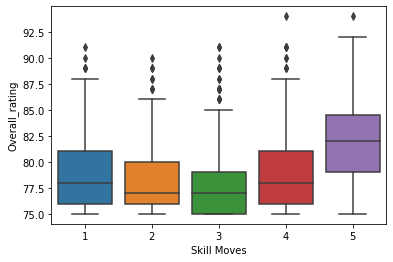

In [274]:
sns.boxplot(df_fifa_stats['Skill Moves'],df_fifa_stats['Overall_rating'])
plt.show()

# 5 Skillers has more Ratings Compared to Others

In [276]:
df_phone = pd.read_csv('C:/Users/hareeshkumar.s/Downloads/Stats_mini_question/Phone.csv')
df_phone.head(5)

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [277]:
df_phone.shape

# There are 820 Rows and 6 columns

(820, 6)

In [278]:
df_phone.info() # Info abt the Data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [280]:
df_phone.describe() # Extra Information abt the data set , Only One numerical 

,duration
count,820.000000
mean,144.304936
std,45.687777
min,0.993514
25%,112.916486
50%,144.179434
75%,175.932308
max,268.458090


# Exploratory Data Analysis

# 1. Handling Nan Values

In [281]:
df_phone.isnull().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

In [282]:
# There are No Null values in the data set

# 2.Handling categorical values

In [284]:
df_phone.item.unique()

array(['data', 'call', 'sms'], dtype=object)

In [285]:
df_phone.network.unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline'], dtype=object)

In [286]:
df_phone.network_type.unique()

array(['data', 'mobile', 'voicemail', 'landline'], dtype=object)

In [287]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df_phone['item_LE'] = LE.fit_transform(df_phone['item'])
df_phone['network_LE'] = LE.fit_transform(df_phone['network'])
df_phone['network_type'] = LE.fit_transform(df_phone['network_type'])

df_phone.head(5)

,date,duration,item,month,network,network_type,item_LE,network_LE
0,15-10-14 6:58,221.321120,data,2014-11,data,0,1,4
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,2,0,3
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,2,0,0
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,2,0,1
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,2,0,1


# 3. Handling Outliers in the Numerical Feature

In [289]:
phone_num = df_phone.select_dtypes(include = np.number)

phone_num.columns

Index(['duration', 'network_type', 'item_LE', 'network_LE'], dtype='object')

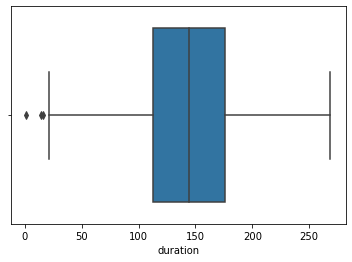

In [292]:
for i in phone_num.columns:
    if i =='network_type' or i=='item_LE' or i =='network_LE':
        continue
    sns.boxplot(df_phone[i])

In [294]:
df_phone['duration'].skew()

0.005764422490882374

In [293]:
# There are No Outliers in Duration Variable


##### a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. 
#Which of the Intervals are wider? Interpret the results.


In [296]:
# Normality Test - Using Shapiro
st.shapiro(df_phone['duration'])

ShapiroResult(statistic=0.9984679818153381, pvalue=0.701244592666626)

In [297]:
# Shapiro Test passed , Data is Normal

In [300]:
# SE = sigma / sqrt(n)
# ME = zalpha/2 *SE
#CI = xbar - ME, xbar + ME

xbar = np.mean(df_phone['duration'])
n = len(df_phone)
sigma = np.std(df_phone['duration'],ddof=1)
alpha = 0.05
SE = sigma / np.sqrt(n)
z_crit_95 = st.norm.isf(alpha/2)
ME_95 = z_crit_95* SE
CI_95 = xbar - ME_95 , xbar + ME_95

z_crit_99 = st.norm.isf(0.01/2)
ME_99 = z_crit_99* SE
CI_99 = xbar - ME_99 , xbar + ME_99



print('95% Confidence Interval Range id :', CI_95)
print('99% Confidence Interval Range id :', CI_99)

95% Confidence Interval Range id : (141.1778397288302, 147.4320313908407)
99% Confidence Interval Range id : (140.19523500408818, 148.41463611558274)


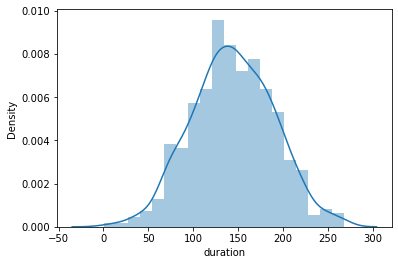

In [301]:
sns.distplot(df_phone['duration'])
plt.show()

In [302]:
# 95% interval  is wider

## b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [306]:
df_phone['network'].unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline'], dtype=object)

In [305]:
# avg duration for all 'data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail','landline' is equal
# avg duration for all 'data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail','landline' not is equal

g1=df_phone[df_phone['network']=='data']['duration']
g2=df_phone[df_phone['network']=='Vodafone']['duration']
g3=df_phone[df_phone['network']=='Meteor']['duration']
g4=df_phone[df_phone['network']=='Tesco']['duration']
g5=df_phone[df_phone['network']=='Three']['duration']
g6=df_phone[df_phone['network']=='voicemail']['duration']

st.f_oneway(g1,g2,g3,g4,g5,g6)

F_onewayResult(statistic=1.6562151601233113, pvalue=0.14283480850066219)

In [307]:
# Since p_value > alpha(0.05), we fail to reject null Hypothesis
# We can conclude that Average Duration calls of All the network is equally distributed

### c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

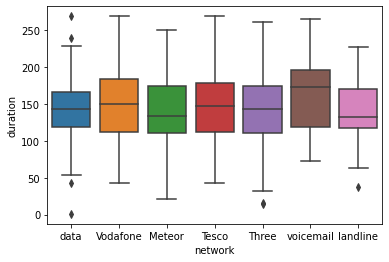

In [309]:
sns.boxplot(x=df_phone['network'],y=df_phone['duration'])
plt.show()

In [310]:
# # Except Vodafone and voice mail the distribution of duration is more or less same

###  d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.


In [311]:
df_phone['item'].unique()

array(['data', 'call', 'sms'], dtype=object)

In [314]:
# Ho - There is no differnce in duration with respect to item(sms,call,data)
# H1 - There is difference in duration with respect to atleast two items

g1=df_phone[df_phone['item']=='data']['duration']
g2=df_phone[df_phone['item']=='call']['duration']
g3=df_phone[df_phone['item']=='sms']['duration']
st.f_oneway(g1,g2,g3)

# Since p_value > alpha, We fail to Reject Null Hypothesis
# There is no differnce in duration with respect to item(sms,call,data)

F_onewayResult(statistic=1.9313964906864993, pvalue=0.1456068656611744)

In [315]:
comp=mc.MultiComparison(df_phone['duration'],groups=df_phone['item'])
post_hoc = comp.tukeyhsd(alpha=0.05)
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
call,data,-6.6347,0.2862,-16.9372,3.6678,False
call,sms,-6.0621,0.207,-14.4472,2.323,False
data,sms,0.5726,0.9,-10.2563,11.4015,False


In [317]:
# Post Hoc is Used for the Detailed Relation Ship between classes
# With the above analysis , we can conclude that there is no differnce in call duartion with respect to items(sms,data,call)

### e)	Perform statistical tests to identify the relation between network and network_type. 

In [321]:
#HO : network type = network 
#H1 : network type != network 

In [319]:
df_phone['network'].unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline'], dtype=object)

In [320]:
df_phone['network_type'].unique()

array([0, 2, 3, 1])

In [335]:
ct=pd.crosstab(df_phone['network_type'],df_phone['network'])
val= ct.values
val

array([[  0,   0,   0,   0, 150,   0,   0],
       [  0,   0,   0,   0,   0,  42,   0],
       [ 87,  84, 215, 215,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  27]], dtype=int64)

In [336]:
st.chi2_contingency(val)

(2460.0,
 0.0,
 18,
 array([[ 15.91463415,  15.36585366,  39.32926829,  39.32926829,
          27.43902439,   7.68292683,   4.93902439],
        [  4.45609756,   4.30243902,  11.01219512,  11.01219512,
           7.68292683,   2.15121951,   1.38292683],
        [ 63.76463415,  61.56585366, 157.57926829, 157.57926829,
         109.93902439,  30.78292683,  19.78902439],
        [  2.86463415,   2.76585366,   7.07926829,   7.07926829,
           4.93902439,   1.38292683,   0.88902439]]))

In [337]:
# Since p_value < alpha , we reject Null and Accept Alternate Hypothesis
# We can conclude that network type != network